In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
#!pip install tensorflow_decision_forests

In [ ]:
import tensorflow_decision_forests as tfdf

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
print('Tensorflow decision Forest :'+ tfdf.__version__ )

Tensorflow decision Forest :1.8.1


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Data house price prediction/House Price Prediction/train.csv")

In [ ]:
train.shape

(1460, 81)

In [ ]:
print("Full train dataset shape is {}".format(train.shape))

Full train dataset shape is (1460, 81)


In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-123-38e30548e26c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],color='g',bins=100,hist_kws={'alpha':0.4});


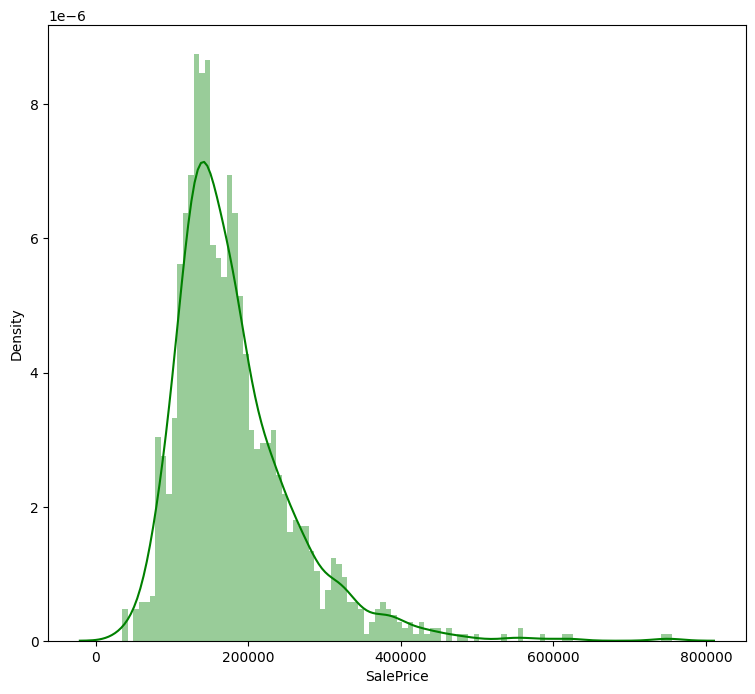

In [ ]:
plt.figure(figsize=(9,8))
sns.distplot(train['SalePrice'],color='g',bins=100,hist_kws={'alpha':0.4});

In [ ]:
# Numerical Data distribution

# We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [ ]:
list(set(train.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [ ]:
train_num=train.select_dtypes(include=['float64','int64'])

In [ ]:
train_num.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500


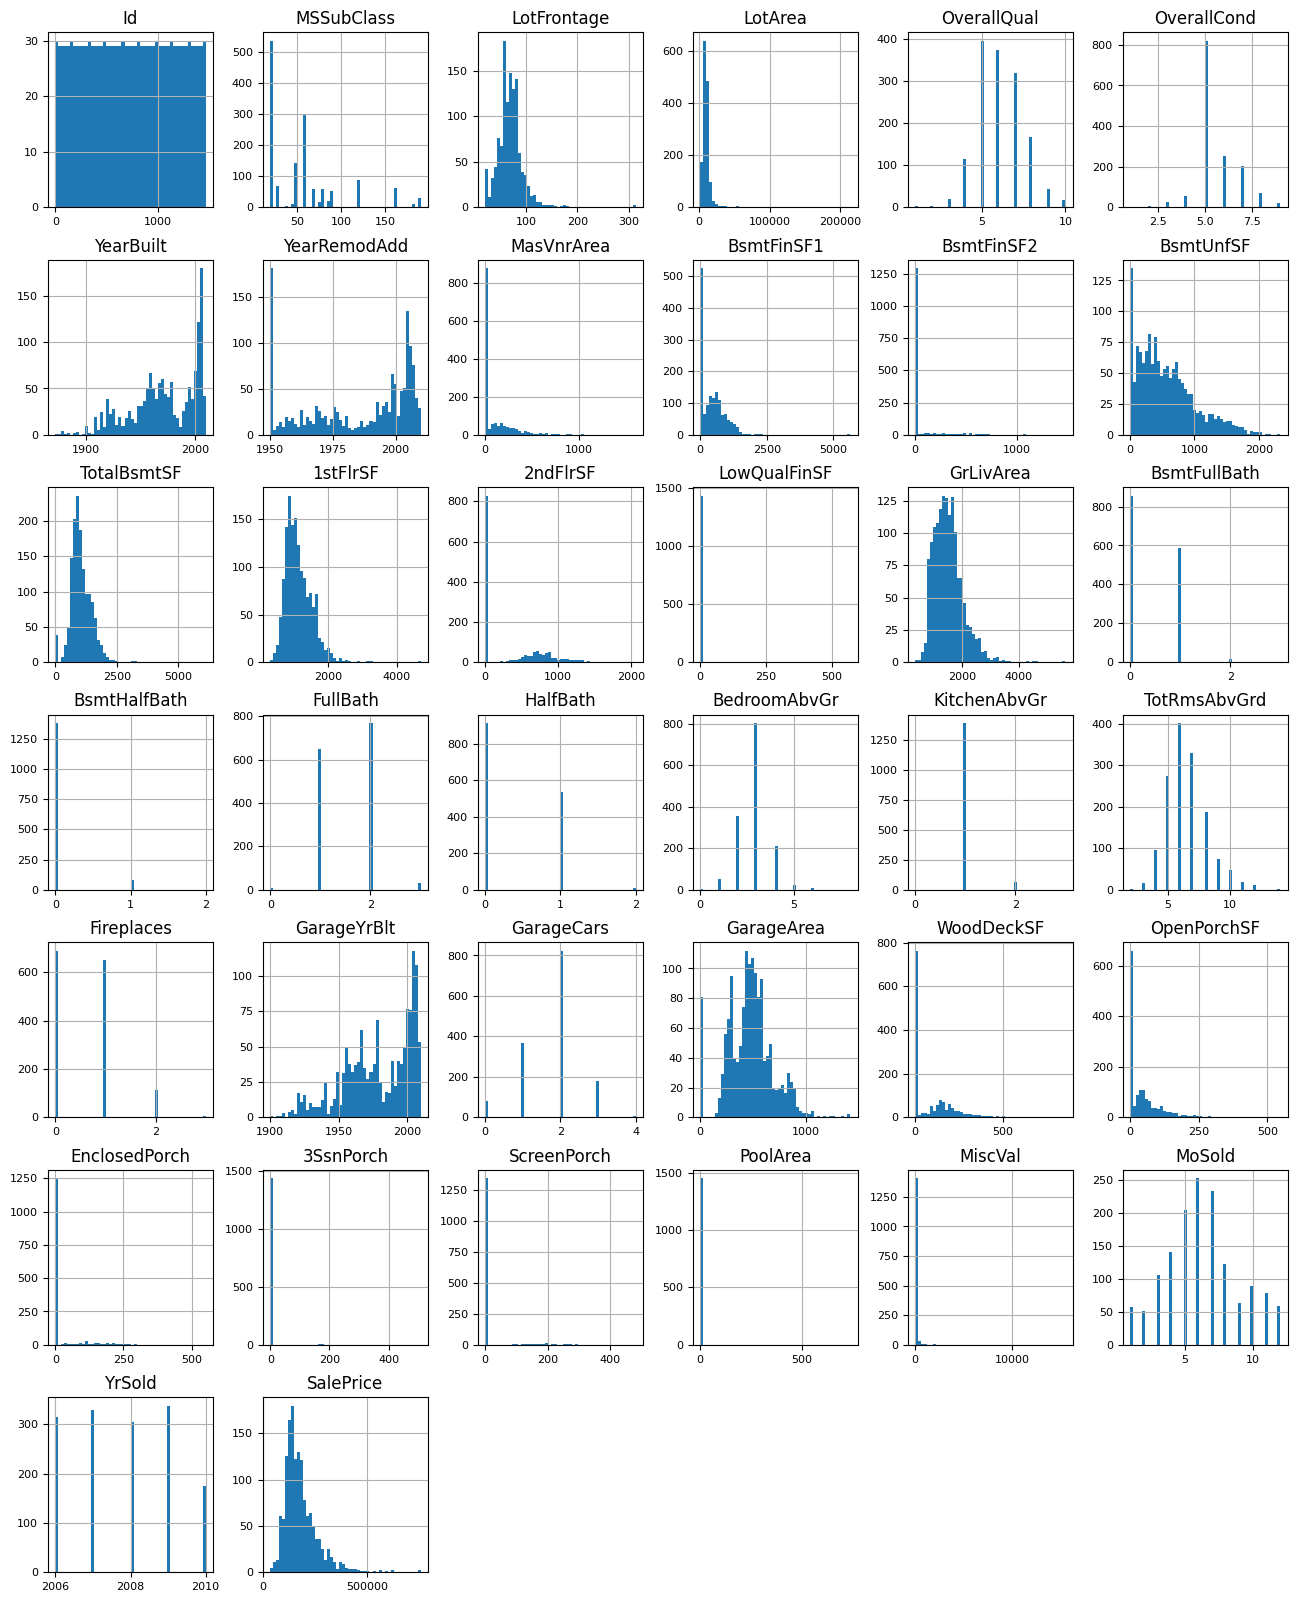

In [ ]:
train_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

In [ ]:
# Prepare the DataSet



This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models, making them a great entry point to Tensorflow and ML.

Now let us split the dataset into training and testing datasets:

In [ ]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices=np.random.rand(len(dataset))<test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train)
print("{} examples in training , {} example in testing.".format(len(train_ds_pd),len(valid_ds_pd)))

1013 examples in training , 447 example in testing.


There's one more step required before we can train the model. We need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).

TensorFlow Datasets is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.


By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task (tfdf.keras.Task.REGRESSION) as a parameter here.

In [ ]:
label='SalePrice'
train_ds=tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

valid_ds=tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label ,task=tfdf.keras.Task.REGRESSION)

# SELECT A MODEL
There are several tree-based models for you to choose from.

1. RandomForestModel

2. GradientBoostedTreesModel

3. CartModel

4. DistributedGradientBoostedTreesModel

To start, we'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.

We can list the all the available models in TensorFlow Decision Forests using the following code:

In [ ]:
tfdf.keras.get_all_models()


[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

How can I configure them?
TensorFlow Decision Forests provides good defaults for you (e.g. the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time). If you would like to configure the learning algorithm, you will find many options you can explore to get the highest possible accuracy.

You can select a template and/or set parameters as follows:

rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)

# Create a Random Forest
Today, we will use the defaults to create the Random Forest Model while specifiyng the task type as tfdf.keras.Task.REGRESSION.

In [ ]:
rf=tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmp_lxmbdn8 as temporary training directory


# Train the model¶

We will train the model using a one-liner.

Note: you may see a warning about Autograph. You can safely ignore this, it will be fixed in the next release.

In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:01.068987. Found 1013 examples.
Training model...
Model trained in 0:00:03.056226
Compiling model...
Model compiled.


 Visualize the model
One benefit of tree-based models is that you can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

Evaluate the model on the Out of bag (OOB) data and the validation dataset
Before training the dataset we have manually seperated 20% of the dataset for validation named as valid_ds.

We can also use Out of bag (OOB) score to validate our RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.

Read more about OOB data here.

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

Note: Smaller values are better for this hyperparameter

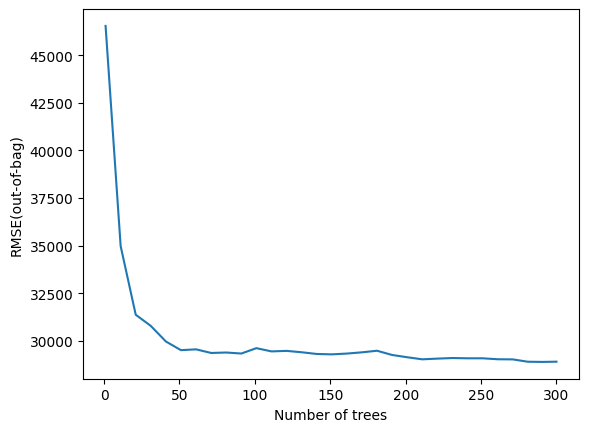

In [ ]:
import matplotlib.pyplot as plt
logs=rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],[log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE(out-of-bag)")
plt.show()

We can also see some general stats on the OOB dataset:



In [ ]:
inspector=rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1013, accuracy=None, loss=None, rmse=28900.62693041347, ndcg=None, aucs=None, auuc=None, qini=None)

Now, let us run an evaluation using the validation dataset

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name,value in evaluation.items():
  print(f'{name},{value:.4f}')

1/1 [==============================] - 0s 468ms/step - loss: 0.0000e+00 - mse: 941564096.0000
loss,0.0000
mse,941564096.0000


Variable importances
Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests. Let us list the available Variable Importances for Decision Trees:

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 NUM_NODES


As an example, let us display the important features for the Variable Importance NUM_AS_ROOT.

The larger the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #63), 111.0),
 ("ExterQual" (4; #22), 59.0),
 ("GarageCars" (1; #32), 39.0),
 ("Neighborhood" (4; #60), 37.0),
 ("GrLivArea" (1; #38), 16.0),
 ("YearBuilt" (1; #77), 16.0),
 ("KitchenQual" (4; #45), 7.0),
 ("1stFlrSF" (1; #0), 5.0),
 ("BsmtQual" (4; #14), 4.0),
 ("GarageArea" (1; #31), 3.0),
 ("BsmtFinSF1" (1; #8), 1.0),
 ("GarageYrBlt" (1; #37), 1.0),
 ("TotalBsmtSF" (1; #74), 1.0)]

Plot the variable importances from the inspector using Matplotlib



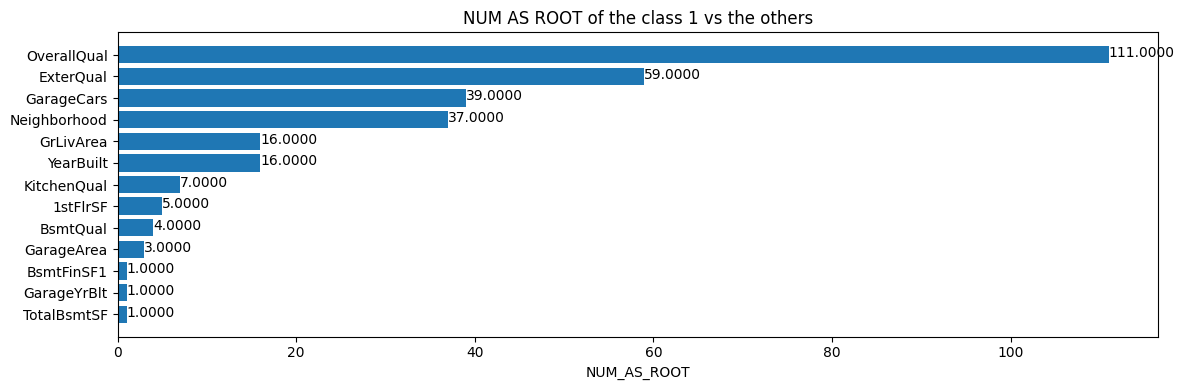

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

Submission
Finally predict on the competition test data using the model.

In [ ]:
test_file_path = "/content/drive/MyDrive/Data house price prediction/House Price Prediction/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

ValueError: ignored

In [ ]:
sample_submission_df = pd.read_csv('/content/drive/MyDrive/Data house price prediction/House Price Prediction/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('submission_house_price_prediction_new.csv', index=False)
sample_submission_df.head()

In [ ]:
sample_submission_df.to_csv('/content/drive/MyDrive/Data house price prediction/House Price Prediction/submission_house_price_prediction_new.csv', index=False)